##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# What does a neural network learn?

### Setting up

**Notebook setup**. Select the "Edit" menu, then "Notebook settings". Choose "GPU" as the hardware accelerator. Check that "Omit code cell output..." is unchecked (so that the output is saved).

**Upload dataset** Select the folder icon from the left sidebar menu. Click the upload button and select the file "lab6data.zip" from your computer.

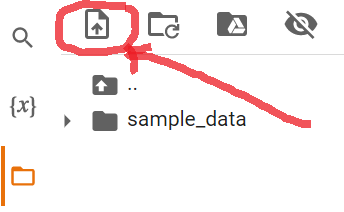

### Extract the dataset

In [ ]:
!unzip lab6data.zip

Archive:  lab6data.zip
replace lab6/test/Cat/10045.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


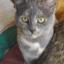

In [ ]:
from PIL import Image
im = Image.open("lab6/train/Cat/161.jpg")
display(im)

### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models


### Prepare the dataset for Keras

In [ ]:
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.


In [ ]:
test_ds1 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


### Experiment 1: train a model from scratch

Follow the instructions in moodle. You can start adding code in cells below and running them by pressing the forward arrow button in the corner. Add more cells as needed.

In [ ]:
def make_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))
    return model

model1 = make_cnn_model()

In [ ]:
model1.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model1.fit(train_ds1, epochs=15)

Epoch 1/15
57/57 [==============================] - 9s 14ms/step - loss: 6.3513 - accuracy: 0.4972
Epoch 2/15
57/57 [==============================] - 1s 12ms/step - loss: 0.6768 - accuracy: 0.5739
Epoch 3/15
57/57 [==============================] - 1s 11ms/step - loss: 0.6483 - accuracy: 0.6167
Epoch 4/15
57/57 [==============================] - 1s 11ms/step - loss: 0.6038 - accuracy: 0.6406
Epoch 5/15
57/57 [==============================] - 1s 11ms/step - loss: 0.5557 - accuracy: 0.6906
Epoch 6/15
57/57 [==============================] - 1s 12ms/step - loss: 0.5271 - accuracy: 0.7172
Epoch 7/15
57/57 [==============================] - 1s 12ms/step - loss: 0.5037 - accuracy: 0.7378
Epoch 8/15
57/57 [==============================] - 1s 12ms/step - loss: 0.4431 - accuracy: 0.7633
Epoch 9/15
57/57 [==============================] - 1s 12ms/step - loss: 0.3880 - accuracy: 0.7956
Epoch 10/15
57/57 [==============================] - 1s 12ms/step - loss: 0.4227 - accuracy: 0.7811
Epoch 11/

In [ ]:
test_loss, test_acc = model1.evaluate(test_ds1, verbose=2)
print(test_acc)


7/7 - 0s - loss: 1.8342 - accuracy: 0.5350 - 226ms/epoch - 32ms/step
0.5350000262260437


Q1: What was the result (average accuracy of classifying cats and dogs in experiment 1)? Explain or comment the result. Answer:
The accuracy of the model is 0.53, whereas the loss is 0.77. 
The accuracy of the trainigsdata predict with a certany of 66.89% which means the test data set differce significantly from the trainingsset.
To specify wheater the model can predict more accurate dogs or cats a conclusion matrix is helpful. It shows that predicting if you get a picture of a dog the chance of predicting it is better than if there is a picture of a cat. but in general the wrong prediction is in both cases very high. This can be because of the poor picture quality and too less training data.

1/1 [==============================] - 0s 59ms/step
Confusion matrix, without normalization
[[54 46]
 [47 53]]


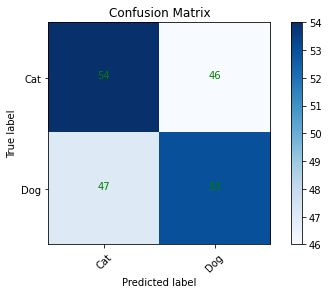

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="Green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



predictions = np.array([])
labels =  np.array([])
for x, y in test_ds1:
  predict_x=model1.predict(x)
  classes_x=np.argmax(predict_x,axis=1)
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels, predictions)

cm = confusion_matrix(y_true=labels, y_pred=predictions)
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Experiment 2: side channel data

In [ ]:
!mkdir -p lab6/train2/Cat lab6/train2/Dog lab6/test2/Cat lab6/test2/Dog


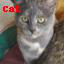

In [ ]:
import os
import os.path
from PIL import ImageDraw

def inject_text(ipath, opath, text):
    files = os.listdir(ipath)
    for fn in files:
        src = os.path.join(ipath, os.path.basename(fn))
        dest = os.path.join(opath, os.path.basename(fn))
        im = Image.open(src)
        canvas = ImageDraw.Draw(im)
        canvas.text((3,3), text, fill=(255, 0, 0))
        im.save(dest)

inject_text("lab6/train/Cat", "lab6/train2/Cat", "Cat")
inject_text("lab6/train/Dog", "lab6/train2/Dog", "Dog")
inject_text("lab6/test/Cat", "lab6/test2/Cat", "Cat")
inject_text("lab6/test/Dog", "lab6/test2/Dog", "Dog")
im = Image.open("lab6/train2/Cat/161.jpg")
display(im)

In [ ]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))
test_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [ ]:
model2 = make_cnn_model()
model2.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model2.fit(train_ds2, epochs=5)

Epoch 1/5
57/57 [==============================] - 1s 12ms/step - loss: 5.1233 - accuracy: 0.7178
Epoch 2/5
57/57 [==============================] - 1s 12ms/step - loss: 0.0063 - accuracy: 0.9994
Epoch 3/5
57/57 [==============================] - 1s 13ms/step - loss: 7.7331e-04 - accuracy: 1.0000
Epoch 4/5
57/57 [==============================] - 1s 12ms/step - loss: 6.7432e-04 - accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 1s 13ms/step - loss: 2.3987e-04 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model2.evaluate(test_ds2, verbose=2)
print(test_acc)

7/7 - 0s - loss: 0.0368 - accuracy: 0.9950 - 198ms/epoch - 28ms/step
0.9950000047683716


1/1 [==============================] - 0s 55ms/step
Confusion matrix, without normalization
[[ 99   1]
 [  0 100]]


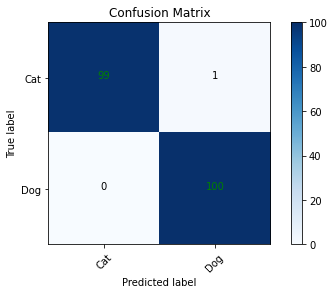

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds2:
  predict_x=model2.predict(x) 
  classes_x=np.argmax(predict_x,axis=1)
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels, predictions)

cm = confusion_matrix(y_true=labels, y_pred=predictions)
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Q2: What was the result after injecting "hints" into images? Explain or comment the result. Answer:
Interestingly the performance of Cats drastically improved to 100% right guesses. This means espacially the additional information could boost the model. On the other hand the performance of dogs boosted massively but there is still one wrong classification. This can be the case because there is one backround which is the same or maybe two animals look very similar.

### Experiment 3: adversarial data

In [ ]:
!mkdir -p lab6/test3/Cat lab6/test3/Dog


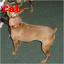

In [ ]:
inject_text("lab6/test/Cat", "lab6/test3/Cat", "Dog")
inject_text("lab6/test/Dog", "lab6/test3/Dog", "Cat")
im = Image.open("lab6/test3/Dog/10010.jpg")
display(im)

In [ ]:
test_ds3 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


In [ ]:
test_loss, test_acc = model2.evaluate(test_ds3, verbose=2)
print(test_acc)

7/7 - 0s - loss: 11.3661 - accuracy: 0.0000e+00 - 92ms/epoch - 13ms/step
0.0


1/1 [==============================] - 0s 16ms/step
Confusion matrix, without normalization
[[  0 100]
 [100   0]]


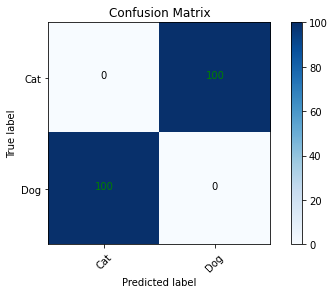

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds3:
  predict_x=model2.predict(x) 
  classes_x=np.argmax(predict_x,axis=1)
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels, predictions)

cm = confusion_matrix(y_true=labels, y_pred=predictions)
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Q3: What was the result after reversing the captions on test images? Intrestingly the labeling in the picture does not affect the result of the cats. But it does label the one last dog as a actual dog 

### Experiment 4: transfer learning

In [ ]:
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

def make_pretrained_model(base_model):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(2)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model4 = make_pretrained_model(base_model)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
train_ds4 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

model4.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model4.fit(train_ds4, epochs=15)

Found 1800 files belonging to 2 classes.
Epoch 1/15
57/57 [==============================] - 10s 103ms/step - loss: 0.4157 - accuracy: 0.8028
Epoch 2/15
57/57 [==============================] - 6s 97ms/step - loss: 0.2371 - accuracy: 0.8956
Epoch 3/15
57/57 [==============================] - 6s 97ms/step - loss: 0.1799 - accuracy: 0.9289
Epoch 4/15
57/57 [==============================] - 6s 97ms/step - loss: 0.1616 - accuracy: 0.9372
Epoch 5/15
57/57 [==============================] - 6s 97ms/step - loss: 0.1347 - accuracy: 0.9444
Epoch 6/15
57/57 [==============================] - 6s 99ms/step - loss: 0.1238 - accuracy: 0.9494
Epoch 7/15
57/57 [==============================] - 6s 98ms/step - loss: 0.1258 - accuracy: 0.9506
Epoch 8/15
57/57 [==============================] - 6s 98ms/step - loss: 0.1070 - accuracy: 0.9622
Epoch 9/15
57/57 [==============================] - 6s 98ms/step - loss: 0.0901 - accuracy: 0.9739
Epoch 10/15
57/57 [==============================] - 6s 99ms/step 

In [ ]:
test_ds4 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

test_loss, test_acc = model4.evaluate(test_ds4, verbose=2)
print(test_acc)

Found 200 files belonging to 2 classes.
7/7 - 2s - loss: 0.2138 - accuracy: 0.9100 - 2s/epoch - 252ms/step
0.9100000262260437


1/1 [==============================] - 1s 826ms/step
Confusion matrix, without normalization
[[89 11]
 [ 7 93]]


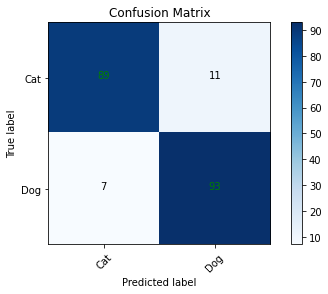

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds4:
  predict_x=model4.predict(x) 
  classes_x=np.argmax(predict_x,axis=1)
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels, predictions)

cm = confusion_matrix(y_true=labels, y_pred=predictions)
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Q4: The ResNet50 model was trained with "Cat" and "Dog" captions placed correctly and tested with the captions reversed like in experiment 3. What happened? Explain or comment the result. Answer:
This model gets quite iritated from the wrong labels. As you can see in comparision with task 5. But still this is just a small side effect that wouldnt be that important also if you scale the data.

### Experiment 5: transfer *learning* with label

In [ ]:
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

def make_pretrained_model(base_model):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(2)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model5 = make_pretrained_model(base_model)

In [ ]:
train_ds5 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

model5.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model5.fit(train_ds5, epochs=15)

Found 1800 files belonging to 2 classes.
Epoch 1/15
57/57 [==============================] - 9s 101ms/step - loss: 0.3834 - accuracy: 0.8222
Epoch 2/15
57/57 [==============================] - 6s 100ms/step - loss: 0.2074 - accuracy: 0.9133
Epoch 3/15
57/57 [==============================] - 6s 100ms/step - loss: 0.1633 - accuracy: 0.9344
Epoch 4/15
57/57 [==============================] - 6s 104ms/step - loss: 0.1437 - accuracy: 0.9456
Epoch 5/15
57/57 [==============================] - 6s 101ms/step - loss: 0.1253 - accuracy: 0.9561
Epoch 6/15
57/57 [==============================] - 6s 101ms/step - loss: 0.1107 - accuracy: 0.9639
Epoch 7/15
57/57 [==============================] - 6s 103ms/step - loss: 0.1024 - accuracy: 0.9639
Epoch 8/15
57/57 [==============================] - 6s 101ms/step - loss: 0.0892 - accuracy: 0.9767
Epoch 9/15
57/57 [==============================] - 6s 101ms/step - loss: 0.0790 - accuracy: 0.9828
Epoch 10/15
57/57 [==============================] - 6s 101

In [ ]:
test_ds5 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

test_loss, test_acc = model5.evaluate(test_ds5, verbose=2)
print(test_acc)

Found 200 files belonging to 2 classes.
7/7 - 3s - loss: 0.1667 - accuracy: 0.9200 - 3s/epoch - 369ms/step
0.9200000166893005


1/1 [==============================] - 1s 1s/step
Confusion matrix, without normalization
[[95  5]
 [11 89]]


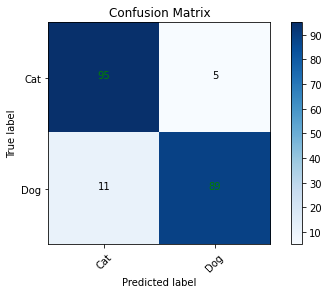

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds5:
  predict_x=model5.predict(x) 
  classes_x=np.argmax(predict_x,axis=1)
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels, predictions)

cm = confusion_matrix(y_true=labels, y_pred=predictions)
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Experiment 6: transfer *learning* without label

In [ ]:
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

def make_pretrained_model(base_model):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(2)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model6 = make_pretrained_model(base_model)

In [ ]:
train_ds6 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

model6.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model6.fit(train_ds6, epochs=15)

Found 1800 files belonging to 2 classes.
Epoch 1/15
57/57 [==============================] - 9s 104ms/step - loss: 0.3360 - accuracy: 0.8506
Epoch 2/15
57/57 [==============================] - 6s 101ms/step - loss: 0.1887 - accuracy: 0.9211
Epoch 3/15
57/57 [==============================] - 6s 101ms/step - loss: 0.1656 - accuracy: 0.9361
Epoch 4/15
57/57 [==============================] - 6s 101ms/step - loss: 0.1336 - accuracy: 0.9467
Epoch 5/15
57/57 [==============================] - 6s 102ms/step - loss: 0.1209 - accuracy: 0.9572
Epoch 6/15
57/57 [==============================] - 6s 101ms/step - loss: 0.1056 - accuracy: 0.9656
Epoch 7/15
57/57 [==============================] - 6s 103ms/step - loss: 0.0997 - accuracy: 0.9678
Epoch 8/15
57/57 [==============================] - 6s 101ms/step - loss: 0.0826 - accuracy: 0.9767
Epoch 9/15
57/57 [==============================] - 6s 101ms/step - loss: 0.0764 - accuracy: 0.9806
Epoch 10/15
57/57 [==============================] - 6s 103

In [ ]:
test_ds6 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

test_loss, test_acc = model6.evaluate(test_ds6, verbose=2)
print(test_acc)

Found 200 files belonging to 2 classes.
7/7 - 2s - loss: 0.1872 - accuracy: 0.9100 - 2s/epoch - 229ms/step
0.9100000262260437


1/1 [==============================] - 1s 795ms/step
Confusion matrix, without normalization
[[92  8]
 [10 90]]


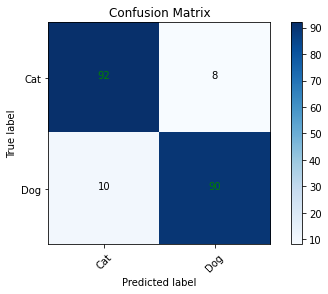

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds6:
  predict_x=model6.predict(x) 
  classes_x=np.argmax(predict_x,axis=1)
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels, predictions)

cm = confusion_matrix(y_true=labels, y_pred=predictions)
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')